In [9]:
import gensim
import pandas as pd

In [12]:
import xml.etree.ElementTree as ET
from gensim.models import Word2Vec
import string

# Load XML file
tree = ET.parse('simplewiki-20230601-abstract.xml')
root = tree.getroot()

# Function to preprocess text
def preprocess_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    tokens = text.split()
    return tokens

# Extract sentences and words
sentences = []
for text in root.findall('text'):
    for sentence in text.findall('sentence'):
        sentence_text = ' '.join(wf.text for wf in sentence.findall('wf') if wf.text is not None)
        tokens = preprocess_text(sentence_text)
        sentences.append(tokens)

# Check if sentences list is not empty
if not sentences:
    print("No sentences found. Check XML parsing and text extraction.")
else:
    print("Number of sentences:", len(sentences))
    print("Example sentence:", sentences[0])

    # Initialize Word2Vec model
    model = Word2Vec(vector_size=100, window=5, min_count=1, workers=4)

    # Build the vocabulary
    model.build_vocab(sentences, progress_per=10000)
    print("Vocabulary built successfully!")

    # Train the Word2Vec model
    model.train(sentences, total_examples=model.corpus_count, epochs=model.epochs)
    print("Model trained successfully!")

    # Save the model
    model.save("word2vec.model")
    print("Model saved successfully!")

    # Test the model
    try:
        similar_words = model.wv.most_similar('who', topn=5)
        print("Most similar words to 'who':", similar_words)
    except KeyError as e:
        print("Word not in vocabulary:", e)


No sentences found. Check XML parsing and text extraction.


In [5]:
vocabulary_size = len(model.wv.key_to_index)
print("Vocabulary Size:", vocabulary_size)

Vocabulary Size: 456


In [6]:
# Get the vocabulary as a dictionary: word -> index
vocabulary = model.wv.key_to_index

# Sort the vocabulary by index (which corresponds to frequency in descending order)
sorted_vocab = sorted(vocabulary.items(), key=lambda x: x[1])

# Get the top 50 words
top_50_words = sorted_vocab[:50]

# Print the top 50 words
for word, index in top_50_words:
    print(word, index)

the 0
of 1
a 2
to 3
in 4
that 5
and 6
is 7
are 8
it 9
they 10
not 11
be 12
as 13
one 14
we 15
for 16
from 17
at 18
this 19
with 20
an 21
was 22
have 23
on 24
but 25
s 26
their 27
he 28
do 29
or 30
by 31
if 32
had 33
all 34
our 35
some 36
would 37
dr 38
two 39
which 40
can 41
there 42
than 43
p53 44
will 45
were 46
no 47
who 48
about 49


In [18]:
import json
from gensim.models import Word2Vec

# Load JSON data
with open('enwiki-20231020-siteinfo-namespaces.json', 'r') as f:
    data = json.load(f)

# Extract namespace names
namespace_names = [info['*'] for info in data['query']['namespaces'].values() if '*' in info]

# Preprocess the names (this might be specific to your use case)
sentences = [[name.replace(' ', '_').lower()] for name in namespace_names if name]

# Initialize Word2Vec model
model = Word2Vec(vector_size=100, window=5, min_count=1, workers=4)

# Build the vocabulary
model.build_vocab(sentences, progress_per=10000)

# Train the Word2Vec model
model.train(sentences, total_examples=model.corpus_count, epochs=model.epochs)

# Save the model
model.save("word2vec.model")

# Test the model
try:
    print(model.wv.most_similar('media', topn=5))
except KeyError as e:
    print(e)


[('wikipedia', 0.3039996922016144), ('gadget_definition_talk', 0.19543619453907013), ('portal_talk', 0.18885749578475952), ('gadget', 0.16691137850284576), ('category', 0.14204353094100952)]


In [16]:
import pandas as pd
from gensim.models import Word2Vec
import csv

# Load your Word2Vec model
model = Word2Vec.load("word2vec.model")

# Read the dataset
# Assuming the file is delimited by semicolons and the columns are ["word1", "word2", "human_similarity"]
df = pd.read_csv("mc.csv", delimiter=';', names=["word1", "word2", "human_similarity"])

# Function to calculate similarity
def calculate_similarity(row):
    try:
        return model.wv.similarity(row['word1'], row['word2'])
    except KeyError as e:
        print(f"Error: {str(e)}")
        return None  # Returning None if any of the words is not in the vocabulary

# Calculate similarity for each row
df['model_similarity'] = df.apply(calculate_similarity, axis=1)

# Save the results to a new CSV file
df.to_csv("similarity_results.csv", index=False)

print("Similarity results have been saved to 'similarity_results.csv'")

Error: "Key 'automobile' not present"
Error: "Key 'gem' not present"
Error: "Key 'journey' not present"
Error: "Key 'boy' not present"
Error: "Key 'coast' not present"
Error: "Key 'asylum' not present"
Error: "Key 'magician' not present"
Error: "Key 'midday' not present"
Error: "Key 'furnace' not present"
Error: "Key 'food' not present"
Error: "Key 'bird' not present"
Error: "Key 'bird' not present"
Error: "Key 'implement' not present"
Error: "Key 'brother' not present"
Error: "Key 'brother' not present"
Error: "Key 'crane' not present"
Error: "Key 'car' not present"
Error: "Key 'monk' not present"
Error: "Key 'cemetery' not present"
Error: "Key 'food' not present"
Error: "Key 'coast' not present"
Error: "Key 'forest' not present"
Error: "Key 'shore' not present"
Error: "Key 'monk' not present"
Error: "Key 'coast' not present"
Error: "Key 'lad' not present"
Error: "Key 'cord' not present"
Error: "Key 'glass' not present"
Error: "Key 'rooster' not present"
Error: "Key 'noon' not present

## Using a different dataset from amazon mobile review to build and train a model

In [19]:
import gensim
import pandas as pd

In [24]:
df = pd.read_json("reviews_Cell_Phones_and_Accessories_5.json", lines=True)

In [25]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A30TL5EWN6DFXT,120401325X,christina,"[0, 0]",They look good and stick good! I just don't li...,4,Looks Good,1400630400,"05 21, 2014"
1,ASY55RVNIL0UD,120401325X,emily l.,"[0, 0]",These stickers work like the review says they ...,5,Really great product.,1389657600,"01 14, 2014"
2,A2TMXE2AFO7ONB,120401325X,Erica,"[0, 0]",These are awesome and make my phone look so st...,5,LOVE LOVE LOVE,1403740800,"06 26, 2014"
3,AWJ0WZQYMYFQ4,120401325X,JM,"[4, 4]",Item arrived in great time and was in perfect ...,4,Cute!,1382313600,"10 21, 2013"
4,ATX7CZYFXI1KW,120401325X,patrice m rogoza,"[2, 3]","awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s,1359849600,"02 3, 2013"


In [26]:
df.shape

(194439, 9)

In [27]:
df.reviewText[0]

"They look good and stick good! I just don't like the rounded shape because I was always bumping it and Siri kept popping up and it was irritating. I just won't buy a product like this again"

In [28]:
review_text = df.reviewText.apply(gensim.utils.simple_preprocess)

In [30]:
model = gensim.models.Word2Vec(window=10, min_count=2, workers=4)

In [31]:
model.build_vocab(review_text, progress_per=1000)

In [32]:
model.epochs

5

In [33]:
model.train(review_text, total_examples=model.corpus_count, epochs=model.epochs)

(61504360, 83868975)

In [34]:
model.save("word2vec.model")

In [35]:
model.wv.most_similar("automobile")

[('inverter', 0.6837260127067566),
 ('electric', 0.6526007652282715),
 ('rv', 0.6418331861495972),
 ('automotive', 0.5961903929710388),
 ('emergency', 0.5929499268531799),
 ('futility', 0.5778218507766724),
 ('electrical', 0.5759992003440857),
 ('igo', 0.5705869793891907),
 ('auxiliary', 0.5653676986694336),
 ('externally', 0.5651736259460449)]

In [1]:
import pandas as pd
from gensim.models import Word2Vec
import csv

# Load your Word2Vec model
model = Word2Vec.load("word2vec.model")

# Read the dataset
# Assuming the file is delimited by semicolons and the columns are ["word1", "word2", "human_similarity"]
df = pd.read_csv("mc.csv", delimiter=';', names=["word1", "word2", "human_similarity"])

# Function to calculate similarity
def calculate_similarity(row):
    try:
        similarity = model.wv.similarity(row['word1'], row['word2'])
        # Transform the similarity to be in the range of 0 to 4
        return 2 * similarity + 2
    except KeyError as e:
        print(f"Error: {str(e)}")
        return None  # Returning None if any of the words is not in the vocabulary

# Calculate similarity for each row
df['model_similarity'] = df.apply(calculate_similarity, axis=1)

# Save the results to a new CSV file
df.to_csv("similarity_results.csv", index=False)

print("Similarity results have been saved to 'similarity_results.csv'")

Error: "Key 'asylum' not present"
Error: "Key 'furnace' not present"
Error: "Key 'crane' not present"
Error: "Key 'crane' not present"
Error: "Key 'oracle' not present"
Error: "Key 'cemetery' not present"
Error: "Key 'woodland' not present"
Similarity results have been saved to 'similarity_results.csv'


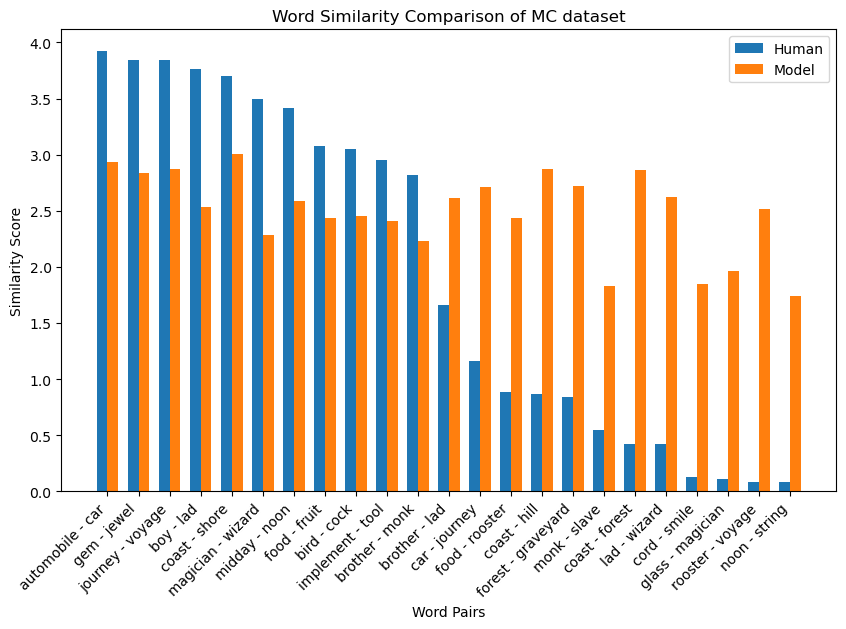

In [2]:
import tkinter as tk
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

class WordSimilarityApp:
    def __init__(self, master):
        self.master = master
        master.title("Word Similarity Comparison of MC dataset")

        self.label = tk.Label(master, text="Word Similarity Comparison")
        self.label.pack()

        self.plot_button = tk.Button(master, text="Plot Similarities", command=self.plot_similarities)
        self.plot_button.pack()

        self.quit_button = tk.Button(master, text="Quit", command=master.quit)
        self.quit_button.pack()

    def plot_similarities(self):
        # Read the similarity results CSV file
        df = pd.read_csv("similarity_results.csv")

        # Filter out rows with NaN values in model_similarity
        df = df.dropna(subset=['model_similarity'])

        # Creating the bar plot
        fig, ax = plt.subplots(figsize=(10, 6))
        index = range(len(df))
        bar_width = 0.35

        bar1 = ax.bar(index, df['human_similarity'], bar_width, label='Human')
        bar2 = ax.bar([p + bar_width for p in index], df['model_similarity'], bar_width, label='Model')

        ax.set_xlabel('Word Pairs')
        ax.set_ylabel('Similarity Score')
        ax.set_title('Word Similarity Comparison of MC dataset')
        ax.set_xticks([p + bar_width / 2 for p in index])
        ax.set_xticklabels(df['word1'] + " - " + df['word2'], rotation=45, ha="right")
        ax.legend()

        canvas = FigureCanvasTkAgg(fig, master=self.master)
        canvas_widget = canvas.get_tk_widget()
        canvas_widget.pack()
        canvas.draw()

root = tk.Tk()
app = WordSimilarityApp(root)
root.mainloop()


In [3]:
import pandas as pd
from gensim.models import Word2Vec
import csv

# Load your Word2Vec model
model = Word2Vec.load("word2vec.model")

# Read the dataset
# Assuming the file is delimited by semicolons and the columns are ["word1", "word2", "human_similarity"]
df = pd.read_csv("rg.csv", delimiter=';', names=["word1", "word2", "human_similarity"])

# Function to calculate similarity
def calculate_similarity(row):
    try:
        similarity = model.wv.similarity(row['word1'], row['word2'])
        # Transform the similarity to be in the range of 0 to 4
        return 2 * similarity + 2
    except KeyError as e:
        print(f"Error: {str(e)}")
        return None  # Returning None if any of the words is not in the vocabulary

# Calculate similarity for each row
df['model_similarity'] = df.apply(calculate_similarity, axis=1)

# Save the results to a new CSV file
df.to_csv("similarity_results_RG.csv", index=False)

print("Similarity results have been saved to 'similarity_results_RG.csv'")

Error: "Key 'furnace' not present"
Error: "Key 'autograph' not present"
Error: "Key 'asylum' not present"
Error: "Key 'asylum' not present"
Error: "Key 'asylum' not present"
Error: "Key 'woodland' not present"
Error: "Key 'oracle' not present"
Error: "Key 'cemetery' not present"
Error: "Key 'woodland' not present"
Error: "Key 'furnace' not present"
Error: "Key 'crane' not present"
Error: "Key 'woodland' not present"
Error: "Key 'cemetery' not present"
Error: "Key 'oracle' not present"
Error: "Key 'crane' not present"
Error: "Key 'oracle' not present"
Error: "Key 'crane' not present"
Error: "Key 'asylum' not present"
Error: "Key 'furnace' not present"
Error: "Key 'tumbler' not present"
Error: "Key 'autograph' not present"
Error: "Key 'woodland' not present"
Error: "Key 'cemetery' not present"
Similarity results have been saved to 'similarity_results_RG.csv'


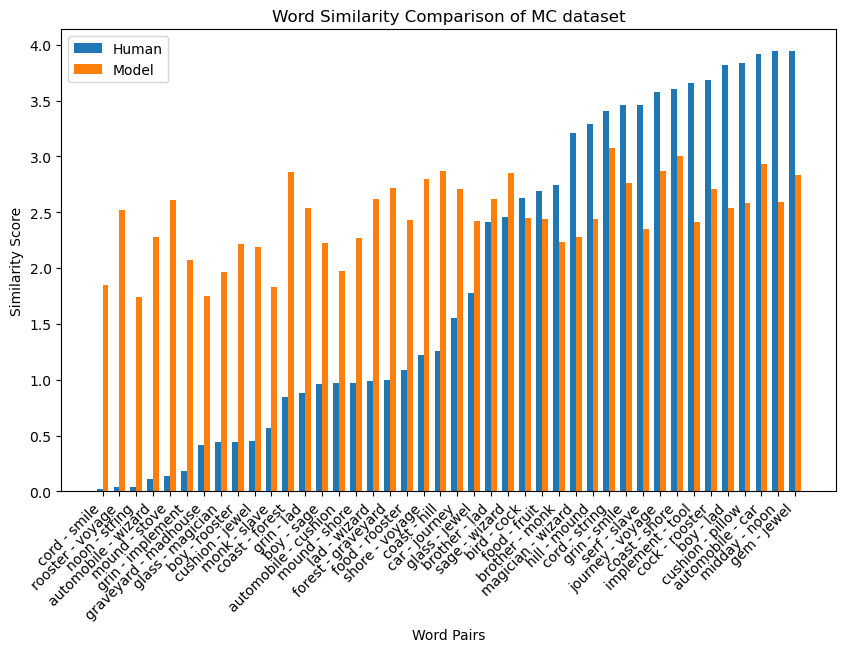

In [4]:
import tkinter as tk
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

class WordSimilarityApp:
    def __init__(self, master):
        self.master = master
        master.title("Word Similarity Comparison of RG dataset")

        self.label = tk.Label(master, text="Word Similarity Comparison")
        self.label.pack()

        self.plot_button = tk.Button(master, text="Plot Similarities", command=self.plot_similarities)
        self.plot_button.pack()

        self.quit_button = tk.Button(master, text="Quit", command=master.quit)
        self.quit_button.pack()

    def plot_similarities(self):
        # Read the similarity results CSV file
        df = pd.read_csv("similarity_results_RG.csv")

        # Filter out rows with NaN values in model_similarity
        df = df.dropna(subset=['model_similarity'])

        # Creating the bar plot
        fig, ax = plt.subplots(figsize=(10, 6))
        index = range(len(df))
        bar_width = 0.35

        bar1 = ax.bar(index, df['human_similarity'], bar_width, label='Human')
        bar2 = ax.bar([p + bar_width for p in index], df['model_similarity'], bar_width, label='Model')

        ax.set_xlabel('Word Pairs')
        ax.set_ylabel('Similarity Score')
        ax.set_title('Word Similarity Comparison of RG dataset')
        ax.set_xticks([p + bar_width / 2 for p in index])
        ax.set_xticklabels(df['word1'] + " - " + df['word2'], rotation=45, ha="right")
        ax.legend()

        canvas = FigureCanvasTkAgg(fig, master=self.master)
        canvas_widget = canvas.get_tk_widget()
        canvas_widget.pack()
        canvas.draw()

root = tk.Tk()
app = WordSimilarityApp(root)
root.mainloop()


In [3]:
import pandas as pd
from gensim.models import Word2Vec
import csv

# Load your Word2Vec model
model = Word2Vec.load("word2vec.model")

# Read the dataset from the text file
# The columns are assumed to be ["word1", "word2", "human_similarity"]
df = pd.read_csv("wordsim_relatedness_goldstandard.txt", delimiter='\t', header=None, names=["word1", "word2", "human_similarity"])

# Function to calculate similarity
def calculate_similarity(row):
    try:
        similarity = model.wv.similarity(row['word1'], row['word2'])
        # Transform the similarity to be in the range of 0 to 4
        return 5 * similarity + 5
    except KeyError as e:
        print(f"Error: {str(e)}")
        return None  # Returning None if any of the words is not in the vocabulary

# Calculate similarity for each row
df['model_similarity'] = df.apply(calculate_similarity, axis=1)

# Save the results to a new CSV file
df.to_csv("similarity_results_wordsim.csv", index=False)

print("Similarity results have been saved to 'similarity_results_wordsim.csv'")

Error: "Key 'Jerusalem' not present"
Error: "Key 'OPEC' not present"
Error: "Key 'ecology' not present"
Error: "Key 'Maradona' not present"
Error: "Key 'OPEC' not present"
Error: "Key 'FBI' not present"
Error: "Key 'psychology' not present"
Error: "Key 'troops' not present"
Error: "Key 'proton' not present"
Error: "Key 'constellation' not present"
Error: "Key 'astronomer' not present"
Error: "Key 'psychology' not present"
Error: "Key 'Jerusalem' not present"
Error: "Key 'Arafat' not present"
Error: "Key 'psychology' not present"
Error: "Key 'seafood' not present"
Error: "Key 'psychology' not present"
Error: "Key 'psychology' not present"
Error: "Key 'psychology' not present"
Error: "Key 'FBI' not present"
Error: "Key 'psychology' not present"
Error: "Key 'Arafat' not present"
Error: "Key 'fertility' not present"
Error: "Key 'minister' not present"
Error: "Key 'psychology' not present"
Error: "Key 'dividend' not present"
Error: "Key 'psychology' not present"
Error: "Key 'laundering' not

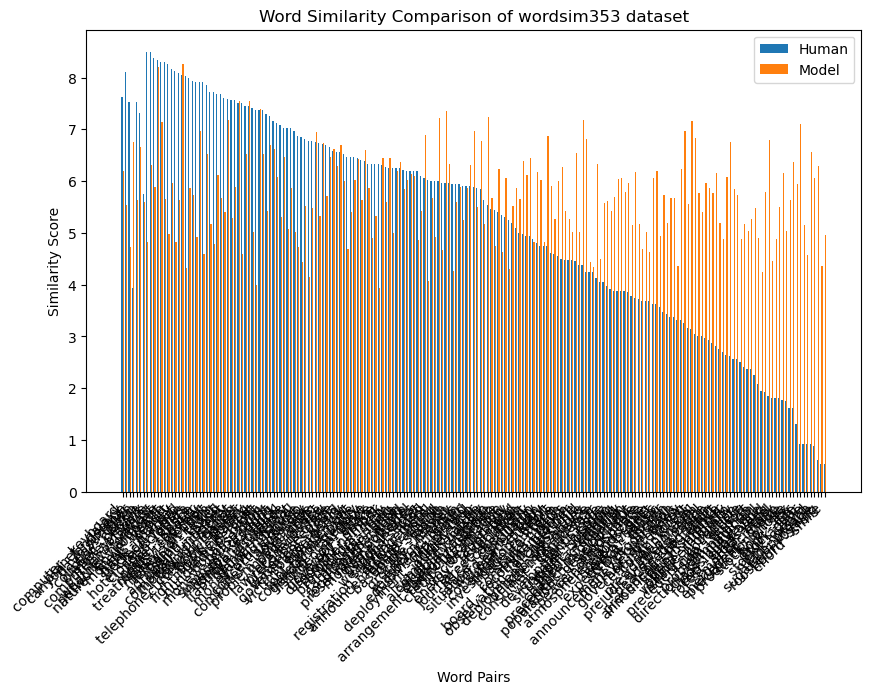

In [4]:
import tkinter as tk
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

class WordSimilarityApp:
    def __init__(self, master):
        self.master = master
        master.title("Word Similarity Comparison of wordsim dataset")

        self.label = tk.Label(master, text="Word Similarity Comparison")
        self.label.pack()

        self.plot_button = tk.Button(master, text="Plot Similarities", command=self.plot_similarities)
        self.plot_button.pack()

        self.quit_button = tk.Button(master, text="Quit", command=master.quit)
        self.quit_button.pack()

    def plot_similarities(self):
        # Read the similarity results CSV file
        df = pd.read_csv("similarity_results_wordsim.csv")

        # Filter out rows with NaN values in model_similarity
        df = df.dropna(subset=['model_similarity'])

        # Creating the bar plot
        fig, ax = plt.subplots(figsize=(10, 6))
        index = range(len(df))
        bar_width = 0.35

        bar1 = ax.bar(index, df['human_similarity'], bar_width, label='Human')
        bar2 = ax.bar([p + bar_width for p in index], df['model_similarity'], bar_width, label='Model')

        ax.set_xlabel('Word Pairs')
        ax.set_ylabel('Similarity Score')
        ax.set_title('Word Similarity Comparison of wordsim353 dataset')
        ax.set_xticks([p + bar_width / 2 for p in index])
        ax.set_xticklabels(df['word1'] + " - " + df['word2'], rotation=45, ha="right")
        ax.legend()

        canvas = FigureCanvasTkAgg(fig, master=self.master)
        canvas_widget = canvas.get_tk_widget()
        canvas_widget.pack()
        canvas.draw()

root = tk.Tk()
app = WordSimilarityApp(root)
root.mainloop()


## Gensim using fastext

In [2]:
import gensim
import pandas as pd

In [5]:
df = pd.read_json("reviews_Cell_Phones_and_Accessories_5.json", lines=True)

In [6]:
review_text = df.reviewText.apply(gensim.utils.simple_preprocess)

In [7]:
from gensim.models import FastText

model = gensim.models.FastText(vector_size=100, window=5, min_count=1, workers=4, sg=1)

In [8]:
model.build_vocab(review_text, progress_per=1000)

In [9]:
model.save("fasttext.model")

In [11]:
import pandas as pd
from gensim.models import FastText

# Load FastText model
model = FastText.load("fasttext.model")

# Read the dataset from the text file
df = pd.read_csv("wordsim_relatedness_goldstandard.txt", delimiter='\t', header=None, names=["word1", "word2", "human_similarity"])

# Function to calculate similarity
def calculate_similarity(row):
    try:
        similarity = model.wv.similarity(row['word1'], row['word2'])
        transformed_similarity = 5 * similarity + 5
        return transformed_similarity
    except KeyError as e:
        print(f"Error: {str(e)}")
        return None

# Calculate similarity for each row
df['model_similarity'] = df.apply(calculate_similarity, axis=1)

# Save the results to a new CSV file
df.to_csv("similarity_results_wordsim_fasttext.csv", index=False)

print("Similarity results have been saved to 'similarity_results_wordsim_fasttext.csv'")


Similarity results have been saved to 'similarity_results_wordsim_fasttext.csv'


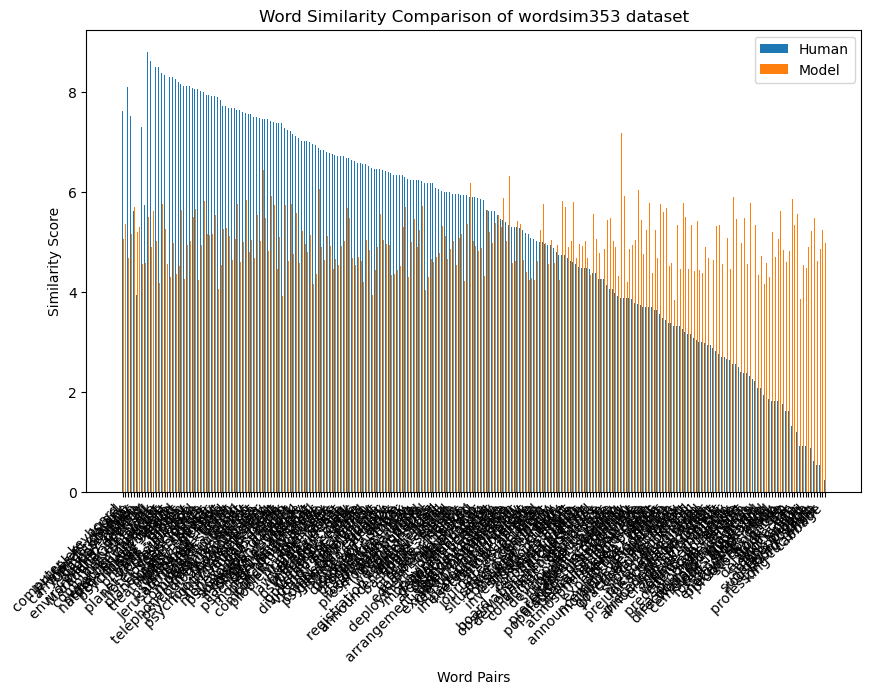

In [12]:
import tkinter as tk
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

class WordSimilarityApp:
    def __init__(self, master):
        self.master = master
        master.title("Word Similarity Comparison of wordsim dataset")

        self.label = tk.Label(master, text="Word Similarity Comparison")
        self.label.pack()

        self.plot_button = tk.Button(master, text="Plot Similarities", command=self.plot_similarities)
        self.plot_button.pack()

        self.quit_button = tk.Button(master, text="Quit", command=master.quit)
        self.quit_button.pack()

    def plot_similarities(self):
        # Read the similarity results CSV file
        df = pd.read_csv("similarity_results_wordsim_fasttext.csv")

        # Filter out rows with NaN values in model_similarity
        df = df.dropna(subset=['model_similarity'])

        # Creating the bar plot
        fig, ax = plt.subplots(figsize=(10, 6))
        index = range(len(df))
        bar_width = 0.35

        bar1 = ax.bar(index, df['human_similarity'], bar_width, label='Human')
        bar2 = ax.bar([p + bar_width for p in index], df['model_similarity'], bar_width, label='Model')

        ax.set_xlabel('Word Pairs')
        ax.set_ylabel('Similarity Score')
        ax.set_title('Word Similarity Comparison of wordsim353 dataset')
        ax.set_xticks([p + bar_width / 2 for p in index])
        ax.set_xticklabels(df['word1'] + " - " + df['word2'], rotation=45, ha="right")
        ax.legend()

        canvas = FigureCanvasTkAgg(fig, master=self.master)
        canvas_widget = canvas.get_tk_widget()
        canvas_widget.pack()
        canvas.draw()

root = tk.Tk()
app = WordSimilarityApp(root)
root.mainloop()

In [2]:
import pandas as pd
from gensim.models import FastText

# Load FastText model
model = FastText.load("fasttext.model")

# Read the dataset
# Assuming the file is delimited by semicolons and the columns are ["word1", "word2", "human_similarity"]
df = pd.read_csv("mc.csv", delimiter=';', names=["word1", "word2", "human_similarity"])

# Function to calculate similarity
def calculate_similarity(row):
    try:
        similarity = model.wv.similarity(row['word1'], row['word2'])
        transformed_similarity = 2 * similarity + 2
        return transformed_similarity
    except KeyError as e:
        print(f"Error: {str(e)}")
        return None

# Calculate similarity for each row
df['model_similarity'] = df.apply(calculate_similarity, axis=1)

# Save the results to a new CSV file
df.to_csv("similarity_results_mc_fasttext.csv", index=False)

print("Similarity results have been saved to 'similarity_results_mc_fasttext.csv'")

Similarity results have been saved to 'similarity_results_mc_fasttext.csv'


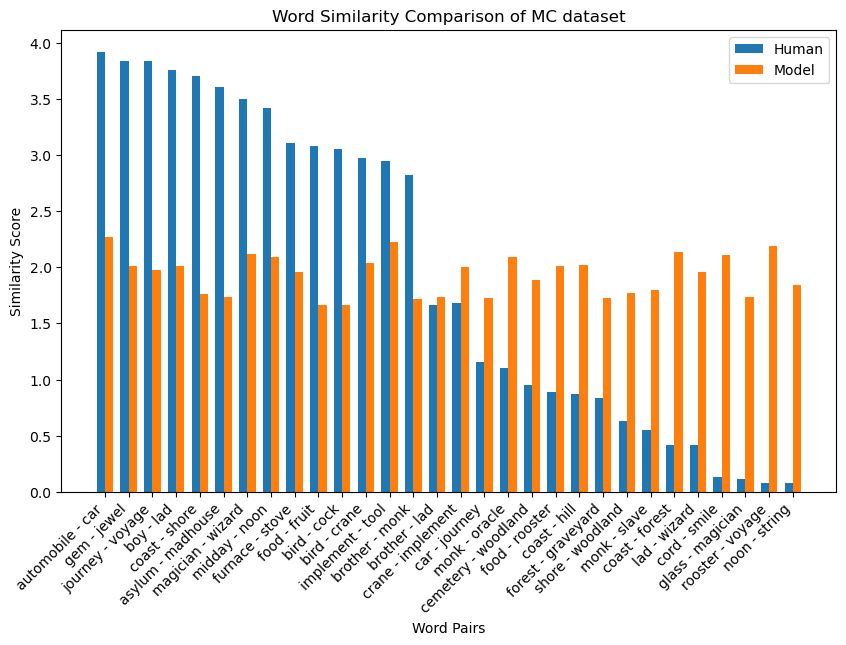

In [3]:
import tkinter as tk
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

class WordSimilarityApp:
    def __init__(self, master):
        self.master = master
        master.title("Word Similarity Comparison of MC dataset")

        self.label = tk.Label(master, text="Word Similarity Comparison")
        self.label.pack()

        self.plot_button = tk.Button(master, text="Plot Similarities", command=self.plot_similarities)
        self.plot_button.pack()

        self.quit_button = tk.Button(master, text="Quit", command=master.quit)
        self.quit_button.pack()

    def plot_similarities(self):
        # Read the similarity results CSV file
        df = pd.read_csv("similarity_results_mc_fasttext.csv")

        # Filter out rows with NaN values in model_similarity
        df = df.dropna(subset=['model_similarity'])

        # Creating the bar plot
        fig, ax = plt.subplots(figsize=(10, 6))
        index = range(len(df))
        bar_width = 0.35

        bar1 = ax.bar(index, df['human_similarity'], bar_width, label='Human')
        bar2 = ax.bar([p + bar_width for p in index], df['model_similarity'], bar_width, label='Model')

        ax.set_xlabel('Word Pairs')
        ax.set_ylabel('Similarity Score')
        ax.set_title('Word Similarity Comparison of MC dataset')
        ax.set_xticks([p + bar_width / 2 for p in index])
        ax.set_xticklabels(df['word1'] + " - " + df['word2'], rotation=45, ha="right")
        ax.legend()

        canvas = FigureCanvasTkAgg(fig, master=self.master)
        canvas_widget = canvas.get_tk_widget()
        canvas_widget.pack()
        canvas.draw()

root = tk.Tk()
app = WordSimilarityApp(root)
root.mainloop()

In [1]:
import pandas as pd
from gensim.models import FastText

# Load FastText model
model = FastText.load("fasttext.model")

# Read the dataset
# Assuming the file is delimited by semicolons and the columns are ["word1", "word2", "human_similarity"]
df = pd.read_csv("rg.csv", delimiter=';', names=["word1", "word2", "human_similarity"])

# Function to calculate similarity
def calculate_similarity(row):
    try:
        similarity = model.wv.similarity(row['word1'], row['word2'])
        transformed_similarity = 2 * similarity + 2
        return transformed_similarity
    except KeyError as e:
        print(f"Error: {str(e)}")
        return None

# Calculate similarity for each row
df['model_similarity'] = df.apply(calculate_similarity, axis=1)

# Save the results to a new CSV file
df.to_csv("similarity_results_rg_fasttext.csv", index=False)

print("Similarity results have been saved to 'similarity_results_rg_fasttext.csv'")

Similarity results have been saved to 'similarity_results_rg_fasttext.csv'


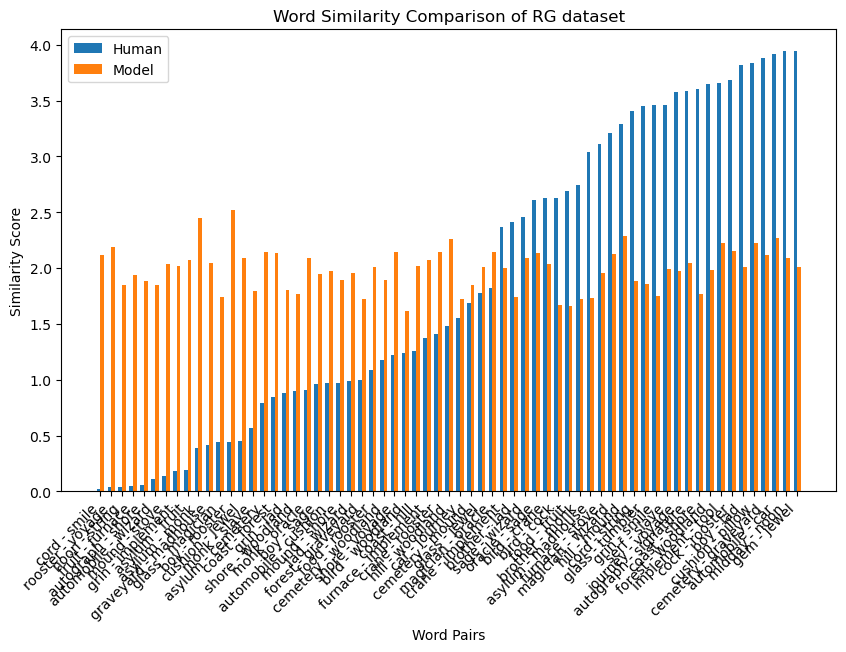

In [2]:
import tkinter as tk
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

class WordSimilarityApp:
    def __init__(self, master):
        self.master = master
        master.title("Word Similarity Comparison of RG dataset")

        self.label = tk.Label(master, text="Word Similarity Comparison")
        self.label.pack()

        self.plot_button = tk.Button(master, text="Plot Similarities", command=self.plot_similarities)
        self.plot_button.pack()

        self.quit_button = tk.Button(master, text="Quit", command=master.quit)
        self.quit_button.pack()

    def plot_similarities(self):
        # Read the similarity results CSV file
        df = pd.read_csv("similarity_results_rg_fasttext.csv")

        # Filter out rows with NaN values in model_similarity
        df = df.dropna(subset=['model_similarity'])

        # Creating the bar plot
        fig, ax = plt.subplots(figsize=(10, 6))
        index = range(len(df))
        bar_width = 0.35

        bar1 = ax.bar(index, df['human_similarity'], bar_width, label='Human')
        bar2 = ax.bar([p + bar_width for p in index], df['model_similarity'], bar_width, label='Model')

        ax.set_xlabel('Word Pairs')
        ax.set_ylabel('Similarity Score')
        ax.set_title('Word Similarity Comparison of RG dataset')
        ax.set_xticks([p + bar_width / 2 for p in index])
        ax.set_xticklabels(df['word1'] + " - " + df['word2'], rotation=45, ha="right")
        ax.legend()

        canvas = FigureCanvasTkAgg(fig, master=self.master)
        canvas_widget = canvas.get_tk_widget()
        canvas_widget.pack()
        canvas.draw()

root = tk.Tk()
app = WordSimilarityApp(root)
root.mainloop()